# Hello, and welcome to another tutorial on using "pandas" and Python related libraries for Data Analytics 

##  The dataset used for this tutorial and the whole set of instructions / questions that reflects in this notebook is based on that provided by an online website.

## The website link is stated below

https://pythontraining.dzone.co.in/python-sample-papers/python-pandas-exercise.html

## On this page, you'll find the link to download the dataset as well as their provided instructions and solution as regards this question. Feel free to explore it more

###  The first step is to import the necessary python modules required for data Analysis tasks.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Next, load in the dataset and read a part of it for inspection and quick overview of the data in question. 

In [2]:
cars_data_df = pd.read_csv("Cars_Data.csv", index_col = 0)
cars_data_df

,brand,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
...,...,...,...,...,...,...,...,...,...
81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0


###  Next, check the necessary attributes and related information about the data to have a better understanding of the data.

In [3]:
cars_data_df.shape

(61, 9)

In [4]:
cars_data_df.size

549

In [5]:
cars_data_df.dtypes

brand                object
body-style           object
wheel-base          float64
length              float64
engine-type          object
num-of-cylinders     object
horsepower            int64
mileage               int64
price               float64
dtype: object

In [6]:
cars_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 88
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             61 non-null     object 
 1   body-style        61 non-null     object 
 2   wheel-base        61 non-null     float64
 3   length            61 non-null     float64
 4   engine-type       61 non-null     object 
 5   num-of-cylinders  61 non-null     object 
 6   horsepower        61 non-null     int64  
 7   mileage           61 non-null     int64  
 8   price             58 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 4.8+ KB


In [7]:
cars_data_df.describe()

,wheel-base,length,horsepower,mileage,price
count,61.000000,61.000000,61.000000,61.000000,58.000000
mean,98.481967,173.098361,107.852459,25.803279,15387.000000
std,6.679234,14.021846,53.524398,8.129821,11320.259841
min,88.400000,141.100000,48.000000,13.000000,5151.000000
25%,94.500000,159.100000,68.000000,19.000000,6808.500000
50%,96.300000,171.200000,100.000000,25.000000,11095.000000
75%,101.200000,177.300000,123.000000,31.000000,18120.500000
max,120.900000,208.100000,288.000000,47.000000,45400.000000


In [8]:
# This is just an improved version of describe by making use of the available parameters 
cars_data_df.describe(include = "all")

,brand,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,mileage,price
count,61,61,61.000000,61.000000,61,61,61.000000,61.000000,58.000000
unique,16,5,NaN,NaN,7,7,NaN,NaN,NaN
top,toyota,sedan,NaN,NaN,ohc,four,NaN,NaN,NaN
freq,7,32,NaN,NaN,46,39,NaN,NaN,NaN
mean,NaN,NaN,98.481967,173.098361,NaN,NaN,107.852459,25.803279,15387.000000
std,NaN,NaN,6.679234,14.021846,NaN,NaN,53.524398,8.129821,11320.259841
min,NaN,NaN,88.400000,141.100000,NaN,NaN,48.000000,13.000000,5151.000000
25%,NaN,NaN,94.500000,159.100000,NaN,NaN,68.000000,19.000000,6808.500000
50%,NaN,NaN,96.300000,171.200000,NaN,NaN,100.000000,25.000000,11095.000000
75%,NaN,NaN,101.200000,177.300000,NaN,NaN,123.000000,31.000000,18120.500000


####  Here, the code checks to confirm if there's any duplicated value in the dataset and the result reveals that there's 1 duplicate value.

In [9]:
cars_data_df.duplicated().sum()

1

####  Let's call out the value and inspect it. One approach i employ is to access the value directly above and below the duplicate value and inspect them together. Most often than not, the value will be directly above or below the duplicate value.

#### First, define a function that takes an integer and return a list of that number with +- difference.
#### Then, access the index of the duplicated value.
#### Due to the format by which the index value is displayed, as a list, to access the numerical value requires indexing as well.
#### So, access the value and pass it to the defined function. Then, pass the output to the "df.loc[ ] and visualize the output and confirm the duplicated values.
#### Note that this might not be a really necessary step, especially when dealing with large dataset with a large number of duplicated values. But sometimes, when doing data analysis, "SEEING IS BELIEVING". The fact that you can inspect an output and confirm its veracity gives you assurance with your skills and improves your overall results.

In [10]:
def increment(number) :
    return [number - 1, number, number + 1]

In [11]:
idx = cars_data_df[cars_data_df.duplicated()].index
new_idx = increment(idx[0])
dup_check = cars_data_df.loc[new_idx]
dup_check

,brand,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,mileage,price
index,,,,,,,,,
31,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
32,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
33,jaguar,sedan,113.0,199.6,dohc,six,176,15,32250.0


#### Now, it's confirmed, the row below is the duplicate value.
#### You can take care of the duplicate value by dropping it with the set of function below.
#### Then, check to confirm if there's any more duplicated values.

In [12]:
cars_data_df = cars_data_df.drop_duplicates()
cars_data_df.duplicated().sum()

0

#### Check if there's missing values in the dataset.
#### The results revealed that there's missing values.
#### Not to worry, we'll tackle that in details in question 2.
#### But in most cases than not, you'll have to fix that before forging ahead with other activities.

In [13]:
cars_data_df.isna().sum()

brand               0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
mileage             0
price               2
dtype: int64

# Python  Pandas Solution Using The Cars Dataset.

###  Question 1
### From the DataFrame, show the first and last 5 rows.

# SOLUTION
#### Use the head() and tail() methods of a DataFrame to get the first and last 5 rows of the Dataset.

In [14]:
cars_data_df.head()

,brand,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


In [15]:
cars_data_df.tail()

,brand,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,mileage,price
index,,,,,,,,,
81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0
87,volvo,sedan,104.3,188.8,ohc,four,114,23,12940.0
88,volvo,wagon,104.3,188.8,ohc,four,114,23,13415.0


###  Question 2
### Clean csv and update the file.

# SOLUTION
#### To do this, i have a python file which contains a function that calculate and returns a DataFrame of :
#### 1. Counts of missing values
#### 2. Percentage of the counts of missing values
#### 3. Counts of non-missing values
#### 4. Percentage of the counts of non-missing values

#### To access this file, i have to change a working directory to that which contains the file.
#### And the steps to achieve that is what follows below
#### I access the file and run it, then i applied it on the dataset to get information about missing values

In [16]:
%cd
%cd Desktop
%cd TDI (WQU)
%cd Random Files
%cd DSN Hackathon
%cd KPMG
%cd Task 1
os.listdir(".")

C:\Users\adeoye oluwatobi
C:\Users\adeoye oluwatobi\Desktop
C:\Users\adeoye oluwatobi\Desktop\TDI (WQU)
C:\Users\adeoye oluwatobi\Desktop\TDI (WQU)\Random Files
C:\Users\adeoye oluwatobi\Desktop\TDI (WQU)\Random Files\DSN Hackathon
C:\Users\adeoye oluwatobi\Desktop\TDI (WQU)\Random Files\DSN Hackathon\KPMG
C:\Users\adeoye oluwatobi\Desktop\TDI (WQU)\Random Files\DSN Hackathon\KPMG\Task 1


['.ipynb_checkpoints',
 'convert_dtype.py',
 'create_columns.py',
 'customer_tenure kde plot.png',
 'describe_na.py',
 'Forage Task1.ipynb',
 'histogram plot of list price.png',
 'job_industry kde plot.png',
 'job_title kde plot.png',
 'kde plot.png',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'profits kde plot.png',
 'property_valuation kde plot.png',
 'wealth_segment kde plot.png',
 '__pycache__']

In [17]:
# %load describe_na.py
def describe_na(df) :
    na_sum = dict(df.isnull().sum())
    not_na_sum = dict(df.notnull().sum())
    total = len(df)
    na_expand = [ na for na in na_sum.values() if na > 0 ]
    na_list = [ (na_s / total) * 100 for na_s in na_sum.values() if na_s > 0 ]
    not_na_expand = [ not_na for not_na in not_na_sum.values() if not_na < total ]
    not_na_list = [ (not_na_s / total) * 100 for not_na_s in not_na_sum.values() if not_na_s < total ]
    na_notna_df = pd.DataFrame( { 'null_counts' : na_expand, 'null_percent(%)' : na_list, 'not_null_counts' : not_na_expand, 
                               'not_null_percent(%)' : not_na_list}, index = [indices for indices, value in na_sum.items() if value > 0] )
    na_notna_df.index.name = 'column_name'
    return na_notna_df


    """This function compiles the missing values of a given DataFrame ."""
    """And displays the output in a nicely formatted DataFrame."""
    """First, it calculates the Series output of the sum of missing values in each column of the given DataFrame.""" 
    """Then it converts the column_name and the corresponding sum of missing values into a key : value pair of a dictionary"""
    """Secondly, it calculates the Series output of the sum of non-missing values in each column of the given DataFrame.""" 
    """Then it converts the column_name and the corresponding sum of non-missing values into a key : value pair of a dictionary"""
    """Next, it calculates the total length of the given DataFrame"""
    """Next, it gets the missing values from the missing values dictionary if the value is greater than Zero"""
    """And it calculates what percentage of the total column is the missing value"""
    """Next, it gets the non-missing values from the non-missing values dictionary if the value is greater than length of the column"""
    """And it calculates what percentage of the total column is the non-missing value"""
    """Finally, it creates a new DataFrame from all the data collated above"""
    """And it gives the index_column a name"""

#### Remember, from checking the missing values earlier, the "price" column is that which has missing values.
#### So, access the column and inspect it before applying the function on the Dataset.
#### Then inspect it after applying the function on the Dataset.

In [18]:
cars_data_df["price"].describe()

count       58.000000
mean     15387.000000
std      11320.259841
min       5151.000000
25%       6808.500000
50%      11095.000000
75%      18120.500000
max      45400.000000
Name: price, dtype: float64

In [19]:
describe_na(cars_data_df)

,null_counts,null_percent(%),not_null_counts,not_null_percent(%)
column_name,,,,
price,2,3.333333,58,96.666667


#### After the function has been applied on the Dataset, inspect it again to confirm the missing value has been replaced.

In [20]:
cars_data_df["price"].fillna(cars_data_df["price"].mean(), inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [21]:
describe_na(cars_data_df)

,null_counts,null_percent(%),not_null_counts,not_null_percent(%)
column_name,,,,


In [22]:
cars_data_df["price"].describe()

count       60.000000
mean     15387.000000
std      11126.736866
min       5151.000000
25%       6835.500000
50%      12392.500000
75%      17673.500000
max      45400.000000
Name: price, dtype: float64

###  Question 3
### Find which car brand price is maximum

# SOLUTION

In [23]:
max_info_df = cars_data_df[["brand", "price"]].sort_values(by = "price", ascending = False)
max_car_price = max_info_df.nlargest(1, "price")
max_car_price

,brand,price
index,,
47,mercedes-benz,45400.0


### Question 4
### Find all "Nissan" Cars informations.

# SOLUTION

In [24]:
nissan_cars_info = cars_data_df[cars_data_df["brand"] == "nissan"]
nissan_cars_info

,brand,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,mileage,price
index,,,,,,,,,
53,nissan,sedan,94.5,165.3,ohc,four,55,45,7099.0
54,nissan,sedan,94.5,165.3,ohc,four,69,31,6649.0
55,nissan,sedan,94.5,165.3,ohc,four,69,31,6849.0
56,nissan,wagon,94.5,170.2,ohc,four,69,31,7349.0
57,nissan,sedan,100.4,184.6,ohcv,six,152,19,13499.0


###  Alternative method to answer question 4

In [25]:
nissan_cars_info_alt = cars_data_df.query("brand == 'nissan'")
nissan_cars_info_alt

,brand,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,mileage,price
index,,,,,,,,,
53,nissan,sedan,94.5,165.3,ohc,four,55,45,7099.0
54,nissan,sedan,94.5,165.3,ohc,four,69,31,6649.0
55,nissan,sedan,94.5,165.3,ohc,four,69,31,6849.0
56,nissan,wagon,94.5,170.2,ohc,four,69,31,7349.0
57,nissan,sedan,100.4,184.6,ohcv,six,152,19,13499.0


###  Question 5
### Let's calculate total number of cars per firm.

# SOLUTION

In [26]:
cars_by_firm = cars_data_df["brand"].value_counts()
cars_by_firm

toyota           7
bmw              6
nissan           5
mazda            5
mercedes-benz    4
audi             4
volkswagen       4
mitsubishi       4
jaguar           3
chevrolet        3
porsche          3
honda            3
alfa-romero      3
dodge            2
volvo            2
isuzu            2
Name: brand, dtype: int64

#### And as an addition to the results, plot a visualization for the returned output.

<AxesSubplot:title={'center':'Car Groups by Firms'}, xlabel='Car Firms / Brands', ylabel='Frequency'>

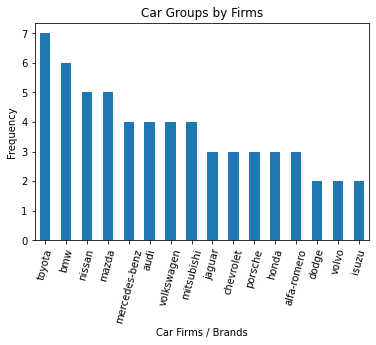

In [27]:
cars_by_firm.plot(kind = "bar",  rot = 75, xlabel = "Car Firms / Brands", ylabel = "Frequency", title = "Car Groups by Firms")

### Alternative method to answer question 5

In [28]:
cars_by_firm_alt = cars_data_df.groupby("brand")["brand"].size().sort_values(ascending = False)
cars_by_firm_alt

brand
toyota           7
bmw              6
nissan           5
mazda            5
volkswagen       4
mitsubishi       4
mercedes-benz    4
audi             4
porsche          3
jaguar           3
honda            3
chevrolet        3
alfa-romero      3
volvo            2
isuzu            2
dodge            2
Name: brand, dtype: int64

<AxesSubplot:title={'center':'Car Groups by Firms'}, ylabel='Car Firms / Brands'>

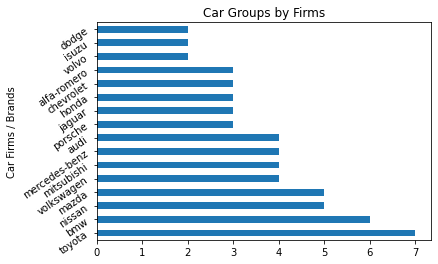

In [29]:
cars_by_firm_alt.plot(kind = "barh",  rot = 35, xlabel = "Car Firms / Brands", ylabel = "Frequency", title = "Car Groups by Firms")

### Another alternative solution to Question 5 and its visualization

In [30]:
cars_by_firm_alt1 = cars_data_df.groupby("brand")["brand"].count().sort_values(ascending = False)
cars_by_firm_alt1

brand
toyota           7
bmw              6
nissan           5
mazda            5
volkswagen       4
mitsubishi       4
mercedes-benz    4
audi             4
porsche          3
jaguar           3
honda            3
chevrolet        3
alfa-romero      3
volvo            2
isuzu            2
dodge            2
Name: brand, dtype: int64

<AxesSubplot:title={'center':'Car Groups by Firms'}, xlabel='Car Firms / Brands', ylabel='Frequency'>

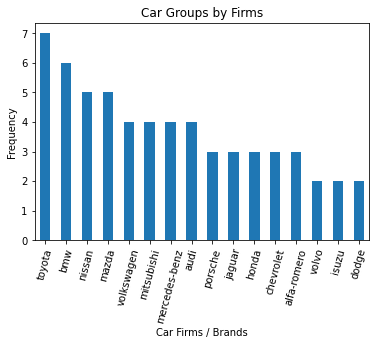

In [31]:
cars_by_firm_alt1.plot(kind = "bar",  rot = 75, xlabel = "Car Firms / Brands", ylabel = "Frequency", title = "Car Groups by Firms")

### Question 6
### Find each brand's Highest priced car.

# SOLUTION

In [32]:
brands_expensive = cars_data_df.groupby("brand")["price"].max()
brands_expensive

brand
alfa-romero      16500.0
audi             18920.0
bmw              41315.0
chevrolet         6575.0
dodge             6377.0
honda            12945.0
isuzu            15387.0
jaguar           36000.0
mazda            18344.0
mercedes-benz    45400.0
mitsubishi        8189.0
nissan           13499.0
porsche          37028.0
toyota           15750.0
volkswagen        9995.0
volvo            13415.0
Name: price, dtype: float64

#### You can create a DataFrame from the output to make the result nicely formatted.

In [33]:
brands_expensive_df = pd.DataFrame({"brand" : brands_expensive.index, "max_price" : brands_expensive.values})
brands_expensive_df

,brand,max_price
0,alfa-romero,16500.0
1,audi,18920.0
2,bmw,41315.0
3,chevrolet,6575.0
4,dodge,6377.0
5,honda,12945.0
6,isuzu,15387.0
7,jaguar,36000.0
8,mazda,18344.0
9,mercedes-benz,45400.0


### Question 7
### Find the average mileage of each car brand.

# SOLUTION

In [34]:
brand_mileage_avg = cars_data_df.groupby("brand")["mileage"].mean()
brand_mileage_avg

brand
alfa-romero      20.333333
audi             20.000000
bmw              19.000000
chevrolet        41.000000
dodge            31.000000
honda            26.333333
isuzu            31.000000
jaguar           14.333333
mazda            28.000000
mercedes-benz    18.000000
mitsubishi       29.500000
nissan           31.400000
porsche          17.000000
toyota           28.714286
volkswagen       31.750000
volvo            23.000000
Name: mileage, dtype: float64

#### You can create a DataFrame from the output so the result can be nicely formatted.

In [35]:
brand_mileage_avg_df = pd.DataFrame({"brand" : brand_mileage_avg.index, "mileage_avg" : brand_mileage_avg.values})
brand_mileage_avg_df

,brand,mileage_avg
0,alfa-romero,20.333333
1,audi,20.000000
2,bmw,19.000000
3,chevrolet,41.000000
4,dodge,31.000000
5,honda,26.333333
6,isuzu,31.000000
7,jaguar,14.333333
8,mazda,28.000000
9,mercedes-benz,18.000000


### Question 8
### Sort all cars by Price.

# SOLUTION

In [36]:
sorted_by_price = cars_data_df.sort_values(by = "price", ascending = False)
sorted_by_price

,brand,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,mileage,price
index,,,,,,,,,
47,mercedes-benz,hardtop,112.0,199.2,ohcv,eight,184,14,45400.0
14,bmw,sedan,103.5,193.8,ohc,six,182,16,41315.0
46,mercedes-benz,sedan,120.9,208.1,ohcv,eight,184,14,40960.0
62,porsche,convertible,89.5,168.9,ohcf,six,207,17,37028.0
15,bmw,sedan,110.0,197.0,ohc,six,182,15,36880.0
35,jaguar,sedan,102.0,191.7,ohcv,twelve,262,13,36000.0
34,jaguar,sedan,113.0,199.6,dohc,six,176,15,35550.0
61,porsche,hardtop,89.5,168.9,ohcf,six,207,17,34028.0
33,jaguar,sedan,113.0,199.6,dohc,six,176,15,32250.0


### Question 9
### Concatenate two DataFrames and make a key for each DataFrame.

# SOLUTION

####  For this exercise, we're not provided with dataset or DataFrames to perform the concatenation operation.
#### And to make things happen, let's make use of the 2 newly created Dataframes in our previous answers.
#### I mean 'brands_expensive_df' and 'brand_mileage_avg' DataFrames.

In [37]:
concat_df = pd.concat([brands_expensive_df, brand_mileage_avg_df], ignore_index = True, axis = 1).drop(2, axis = 1)
concat_df.columns = ["brands", "max_price", "avg_mileage"]
concat_df

,brands,max_price,avg_mileage
0,alfa-romero,16500.0,20.333333
1,audi,18920.0,20.000000
2,bmw,41315.0,19.000000
3,chevrolet,6575.0,41.000000
4,dodge,6377.0,31.000000
5,honda,12945.0,26.333333
6,isuzu,15387.0,31.000000
7,jaguar,36000.0,14.333333
8,mazda,18344.0,28.000000
9,mercedes-benz,45400.0,18.000000


### Question 10
### Merge two DataFrames using the following conditions.
#### Create two DataFrames using using two dicts (Dictionaries).
#### Merge two DataFrames and append second DataFrames as a new column to first Dataframe.

# SOLUTION

#### Same challenges like we had in question 9, there's no dataset for which to execute the task
#### Hence, we'll make use of the 2 DataFrames with which we executed Question 9.

In [38]:
merge_df = brands_expensive_df.merge(brand_mileage_avg_df, how = "inner", on = "brand")
merge_df

,brand,max_price,mileage_avg
0,alfa-romero,16500.0,20.333333
1,audi,18920.0,20.000000
2,bmw,41315.0,19.000000
3,chevrolet,6575.0,41.000000
4,dodge,6377.0,31.000000
5,honda,12945.0,26.333333
6,isuzu,15387.0,31.000000
7,jaguar,36000.0,14.333333
8,mazda,18344.0,28.000000
9,mercedes-benz,45400.0,18.000000
